In [7]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import the df
df = pd.read_csv('../data/makeovermonday/data/data_line_chart.csv')
df.head()

,year,united_states,russia,iran,china,canada,afghanistan,albania,algeria,angola,...,ussr,ukraine,united_arab_emirates,united_kingdom,uzbekistan,venezuela,vietnam,world,yemen,yugoslavia
0,1900,0.265826,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.265826,NaN,0.0
1,1901,0.294581,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.294581,NaN,0.0
2,1902,0.323337,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.323337,NaN,0.0
3,1903,0.352092,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.352092,NaN,0.0
4,1904,0.380848,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.380848,NaN,0.0


In [9]:
# df['year'] = pd.to_datetime(df['year'], format='%Y') # change to date time format, might have to change to the middle of the year though

In [10]:
df_pivot  = df.melt(id_vars = ['year'],
                    var_name = 'country',
                    value_name = 'Production (EJ)')
df_pivot.head()

,year,country,Production (EJ)
0,1900,united_states,0.265826
1,1901,united_states,0.294581
2,1902,united_states,0.323337
3,1903,united_states,0.352092
4,1904,united_states,0.380848


In [11]:
df_pivot = df_pivot[df_pivot['country'].isin(['united_states', 'russia', 'iran', 'china', 'canada'])]
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             615 non-null    int64  
 1   country          615 non-null    object 
 2   Production (EJ)  530 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.2+ KB


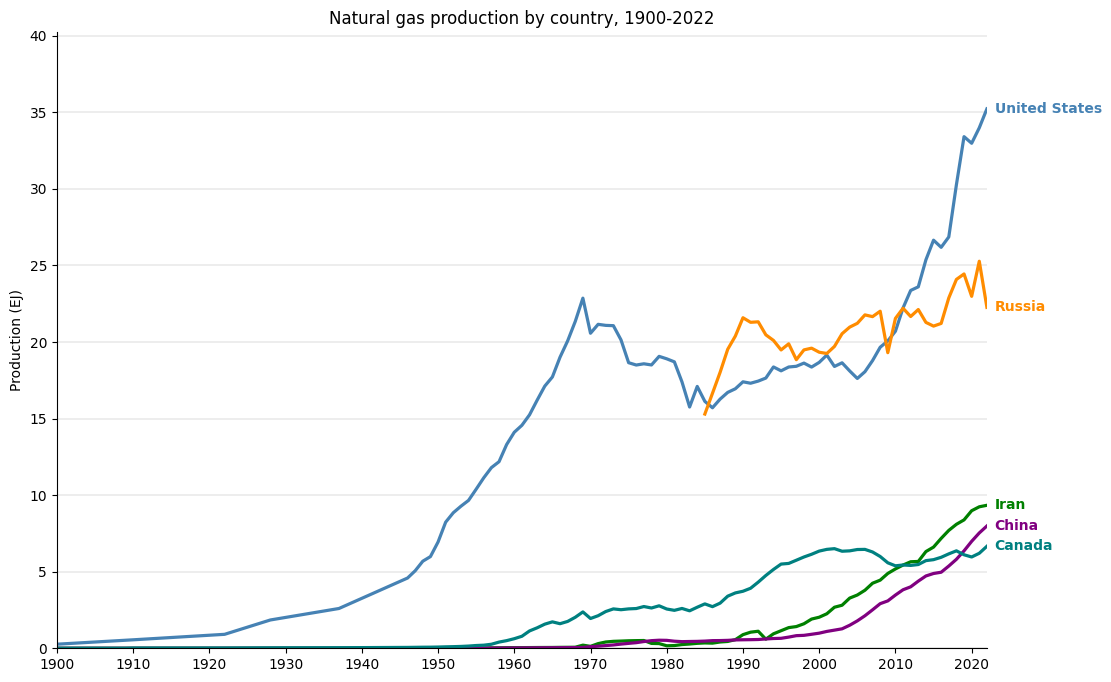

In [13]:
palette = {
    'united_states': 'steelblue',
    'russia': 'darkorange',
    'iran': 'green',
    'china': 'purple',
    'canada': 'teal'
}


plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df_pivot, x = 'year', y = 'Production (EJ)', hue = 'country', palette = palette, linewidth = 2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Natural gas production by country, 1900-2022")
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.2)  # Horizontal gridlines
# Remove the legend
ax.get_legend().remove()

for country, color in palette.items():
    # Get the last value in the 'year' and 'Production (EJ)' for the specific country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    # Capitalize the first letter, replace underscores, and bold the text without LaTeX
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=color, va='center', fontweight='bold'
    )
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')
plt.show()